In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [57]:
Data = r"C:\Users\anu10\OneDrive\Documents\Advanced Analytics and Dashboard Achievement 6"

In [58]:
df = pd.read_csv(os.path.join(Data,"kc_house_data.csv"  ))

In [59]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
# Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
df.columns = df.columns.str.strip()

In [62]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [88]:
# Reshape the variables we ned into numpy arrays and put then into seperate objects
# Reshape the variables we ned into numpy arrays and put then into seperate objects
x = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [89]:
# We are plotting a graph for the train and prediction of the data for least squares
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

# Regression Analysis
# Create a regression object
regression = LinearRegression()

# Fit the regression to the train set
regression.fit(x_train, y_train)

# Predict the values of y using x
y_predicted = regression.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Print the results
print('Slope:', regression.coef_)
print('Mean squared error:', mse)
print('R2 score:', r2)


Slope: [[279.73801283]]
Mean squared error: 68028810848.92374
R2 score: 0.4980305037419229


The Mean Squared Error (MSE) provides a measure of the average squared difference between the predicted and actual values. On the other hand, R-squared (R2) represents the proportion of the variance in the dependent variable that is predictable from the independent variable.

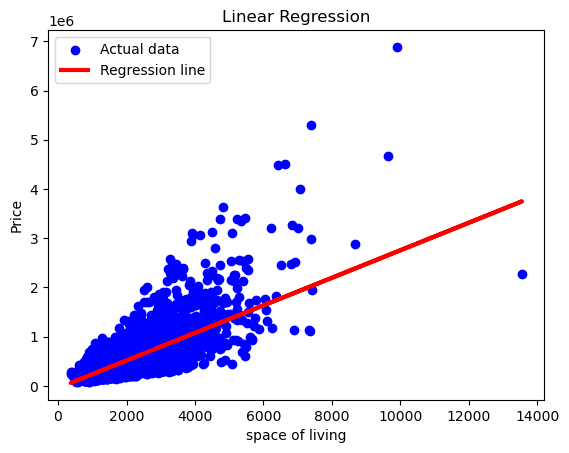

In [93]:
# Plot the regression line
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_predicted, color='red', linewidth=3, label='Regression line')
plt.xlabel('space of living')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

C:\Users\anu10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


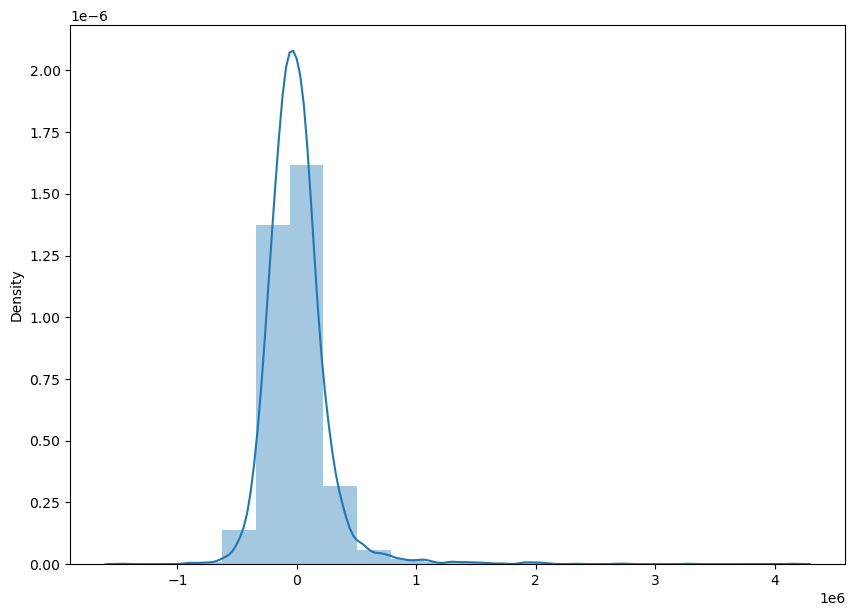

In [94]:
#we plot graph for difference between y test and y prediction
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot((y_test-y_predicted),bins=20);

In [95]:
# Created a dataframe comparing the real and the predicted values of y
data_1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data_1.head(5)

,Actual,Predicted
0,805000.0,632902.255397
1,390000.0,543945.567315
2,379900.0,462262.067568
3,485000.0,739202.700274
4,455000.0,336379.961792


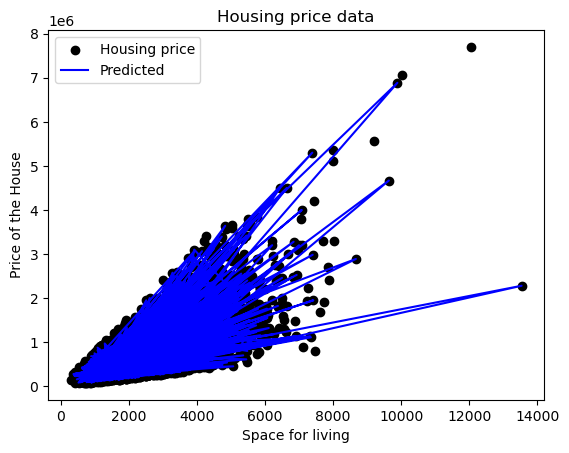

In [99]:
fig1 = plt.figure(1)
plt.scatter(x,y,label='Housing price',color='black')
plt.plot(x_test,y_test,label='Predicted',color='blue')
plt.xlabel('Space for living')
plt.ylabel('Price of the House')
plt.title('Housing price data')
plt.legend()


Hypothesis: If sqft living is more then price of the house is also high.